# Problem Statement

## From the given data predict if the client will subscribe a financial service or not. 

# Features

- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or 
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
-  11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Loading Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
data=pd.read_csv('bank-additional-full.csv', ';')
pd.set_option("display.max_columns",None)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Basic Checks

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- There are no null values in the dataset

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Renaming some features to have better understanding in EDA

In [6]:
data.rename(columns={"day_of_week":"day"},inplace=True)
data.rename(columns={"duration":"call_duration"},inplace=True)
data.rename(columns={"campaign":"campaign_contacts"},inplace=True)
data.rename(columns={"pdays":"passed_days"},inplace=True)
data.rename(columns={"previous":"previous_contacts"},inplace=True)
data.rename(columns={"poutcome":"previous_outcome"},inplace=True)
data.rename(columns={"emp.var.rate":"emp_var_rate"},inplace=True)
data.rename(columns={"cons.price.idx":"cons_price_idx"},inplace=True)
data.rename(columns={"cons.conf.idx":"cons_conf_idx"},inplace=True)
data.rename(columns={"euribor3m":"euribor_3_month"},inplace=True)
data.rename(columns={"nr.employed":"num_employed"},inplace=True)
data.rename(columns={"y":"outcome"},inplace=True)

# Exploratory Data Analysis

## Age

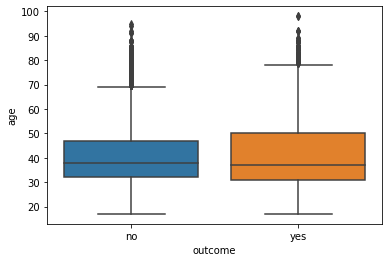

In [7]:
sns.boxplot(x="outcome", y="age",data=data)
plt.show()

- From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

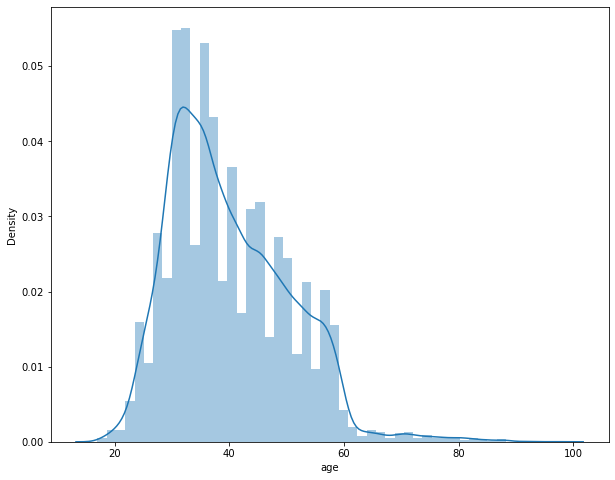

In [8]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])
plt.show()

- As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

## Job

In [9]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

- We can see that the customers who have jobs as "admin"are highest in numbers. lets find out what would be the distribution for each classes as well.

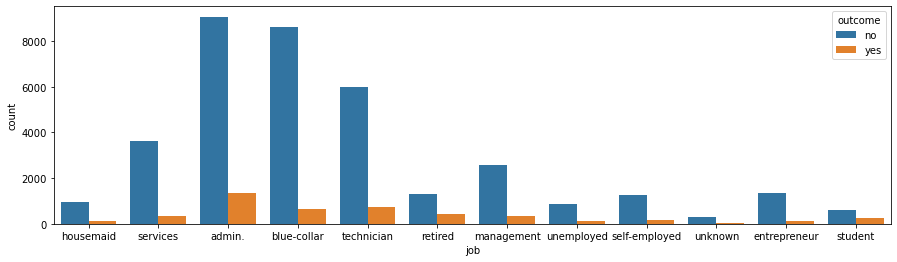

In [10]:
plt.figure(figsize=(15,4))
sns.countplot(x="job",hue="outcome",data=data)
plt.show()

- From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing to the financial service, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

## Marital

In [11]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

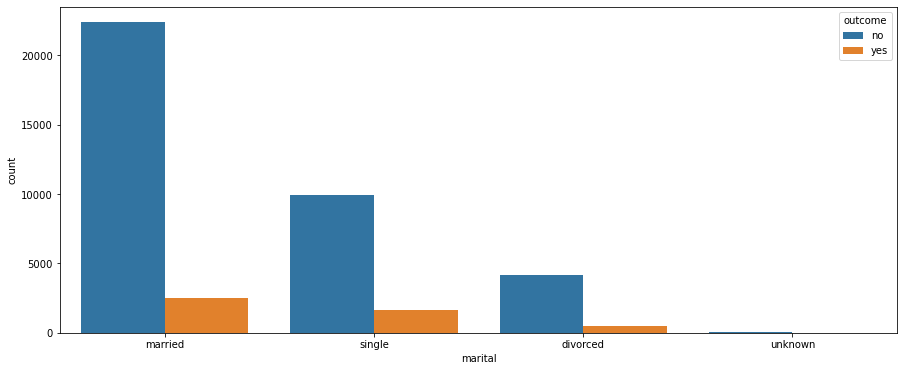

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x="marital",hue="outcome",data=data)
plt.show()

- As most of the customers are married, they are the highest in subcribing and not subcribing the financial service.
- There is also a category where marital status of the customers is unknown.

## Education

In [13]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

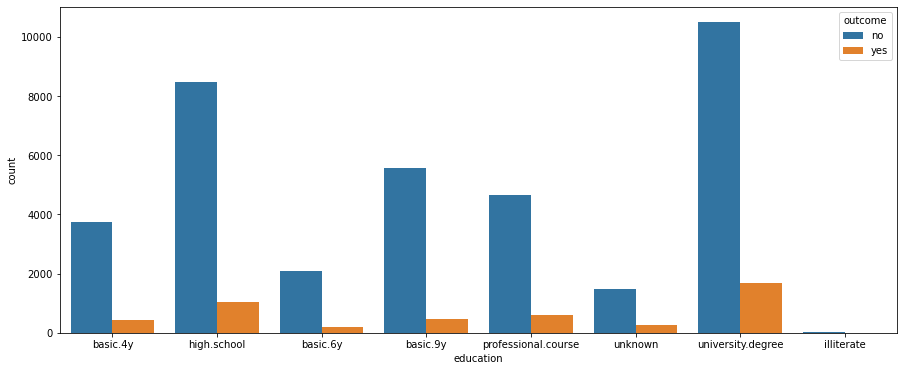

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x="education",hue="outcome",data=data)
plt.show()

- Most of the customers hold a university degree. Also they are the highest while subcribing and not subcribing the data.
- Customers who have studied upto high school and above are the most to subcribe to financial service. This maybe beacuse of better understanding and outlook regarding the bank services.

## Default

In [15]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

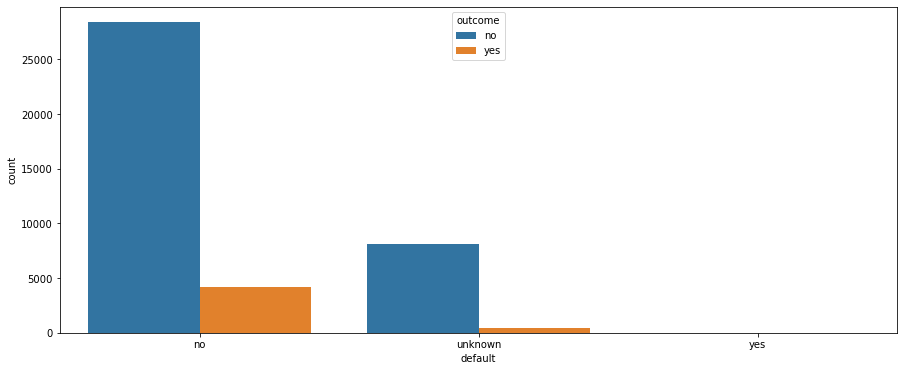

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x="default",hue="outcome",data=data)
plt.show()

- There are only 3 customers who have credit in default. Majority of the customers don't have, and for the rest of the customers this field is unknown.

## Housing

In [17]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

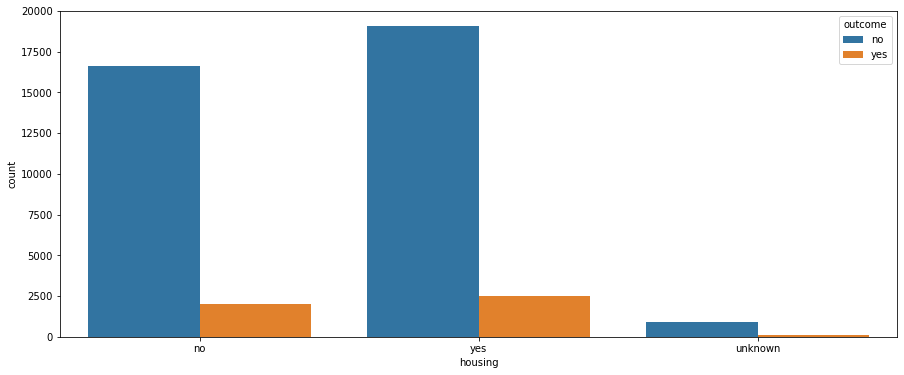

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x="housing",hue="outcome",data=data)
plt.show()

- Majority of the customers have a housing loan.
- Customers who have housing loan maybe subcribing to the financial service to keep their debt insured.

## Loan

In [19]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

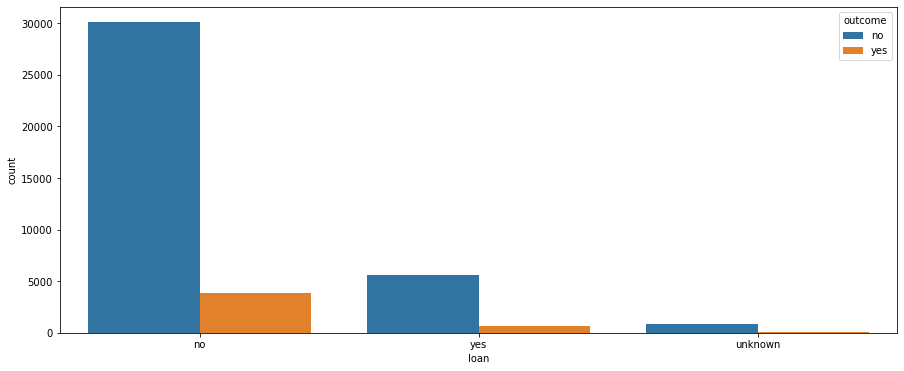

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x="loan",hue="outcome",data=data)
plt.show()

- Majority of the customers do not have a loan. This might explain large numbers of no values in the default feature.
- Customers who do not have loan are highest to subcribe to the financial service as they do not have any other financial liabilities.

## Contact

In [21]:
data.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [22]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

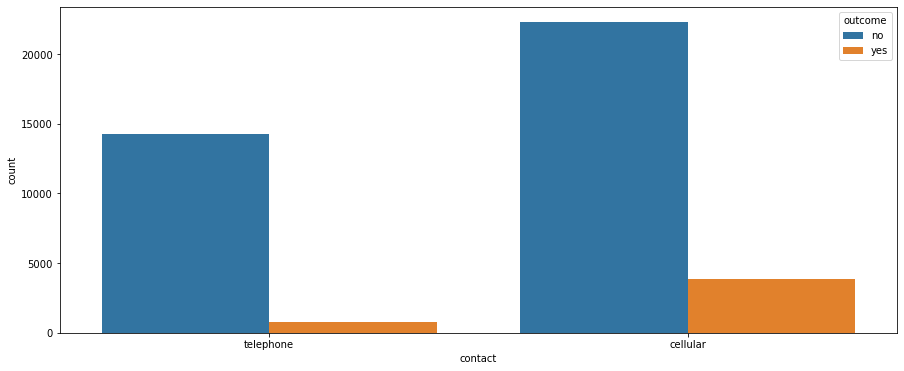

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x="contact",hue="outcome",data=data)
plt.show()

- Most customers were contacted on their cellphones and they are the highest to subcribe to the data.

## Month

In [24]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

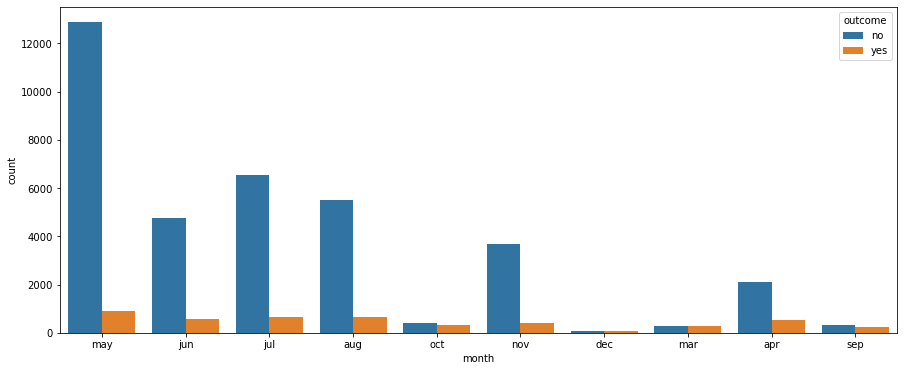

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x="month",hue="outcome",data=data)
plt.show()

- Month of may has highest value count. This may explain high subcribing and not subcribing rate.
- Lowest outcome for both classes is in month of december.

## Day

In [26]:
data.day.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day, dtype: int64

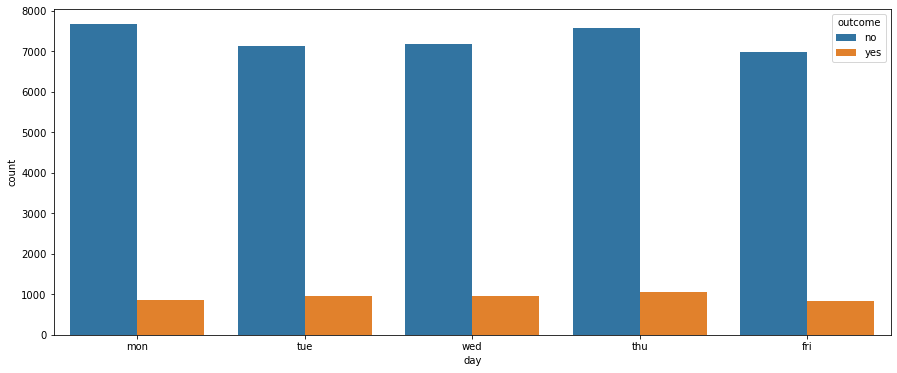

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(x="day",hue="outcome",data=data)
plt.show()

- As we have same amount of data for all days of week, the subcribing rate for both classes is almost same.

## Call Duration

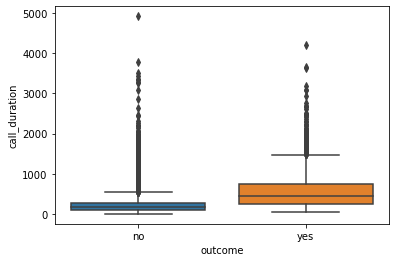

In [28]:
sns.boxplot(x="outcome", y="call_duration",data=data)
plt.show()

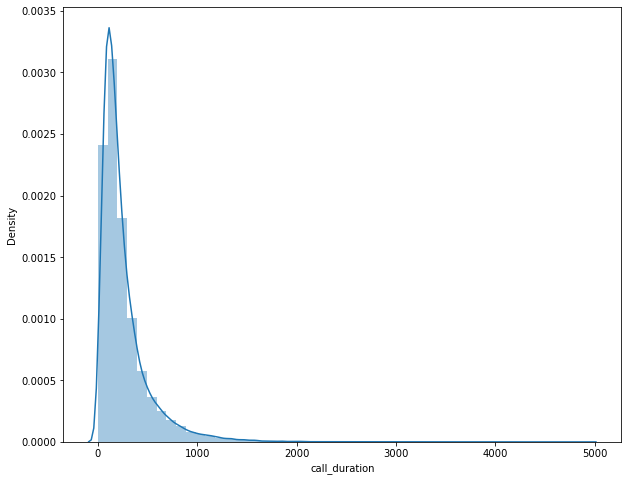

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(data["call_duration"])
plt.show()

- From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable.
- Also the feature is highly skewed.

## Campaign Contacts

In [30]:
data.campaign_contacts.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
26        8
28        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
42        2
40        2
41        1
56        1
39        1
37        1
Name: campaign_contacts, dtype: int64

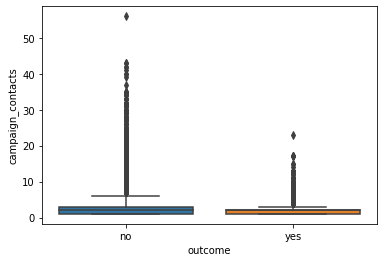

In [31]:
sns.boxplot(x="outcome", y="campaign_contacts",data=data)
plt.show()

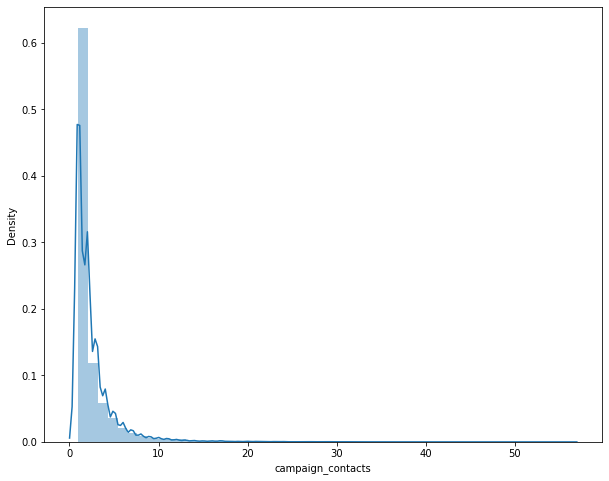

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(data["campaign_contacts"])
plt.show()

- Most of the customers were contacted once or twice.
- The feature is highly skewed.

## Passed Days

In [33]:
data.passed_days.unique() ## convert numerical to categorical

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [34]:
data.passed_days.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: passed_days, dtype: int64

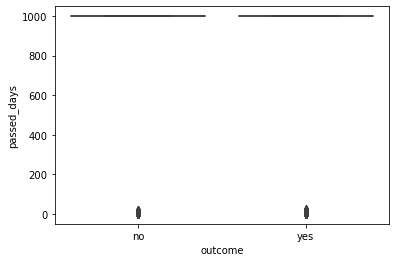

In [35]:
sns.boxplot(x="outcome", y="passed_days",data=data)
plt.show()

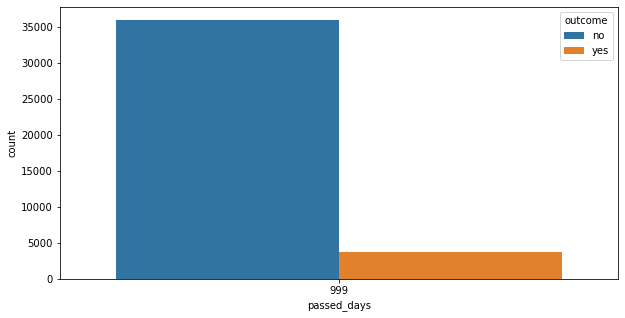

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x="passed_days",hue="outcome",data=data.loc[data["passed_days"]==999])
plt.show()

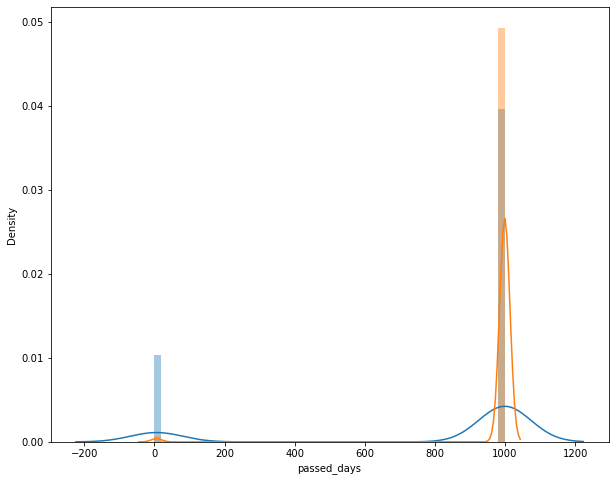

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(data[data["outcome"]=="yes"]["passed_days"])
sns.distplot(data[data["outcome"]=="no"]["passed_days"])
plt.show()

- In this feature 999 means not contacted.
- Most of the customers have never been contacted.
- The unit of unique values in the feature is days, but unit for "999" is null. This feature must be treated in data preprocessing and feature engineering phase.

# Previous Contacts

In [38]:
data.previous_contacts.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [39]:
data.previous_contacts.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous_contacts, dtype: int64

In [40]:
data[data["outcome"]=="yes"]["previous_contacts"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous_contacts, dtype: int64

In [41]:
data[data["outcome"]=="no"]["previous_contacts"].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous_contacts, dtype: int64

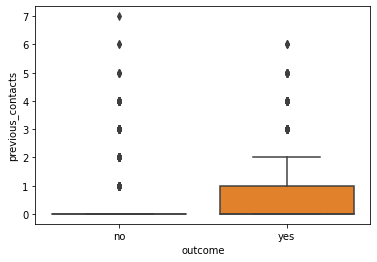

In [42]:
sns.boxplot(x="outcome", y="previous_contacts",data=data)
plt.show()

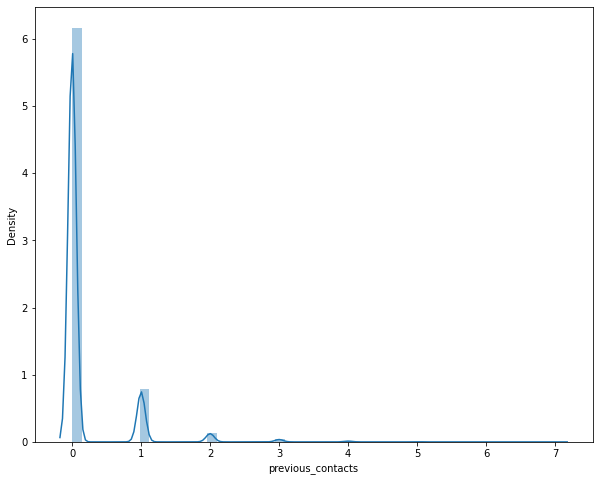

In [43]:
plt.figure(figsize=(10,8))
sns.distplot(data["previous_contacts"])
plt.show()

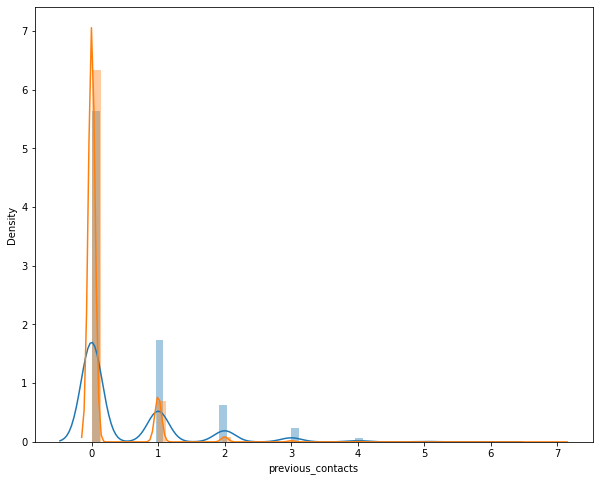

In [44]:
plt.figure(figsize=(10,8))
sns.distplot(data[data["outcome"]=="yes"]["previous_contacts"])
sns.distplot(data[data["outcome"]=="no"]["previous_contacts"])
plt.show()

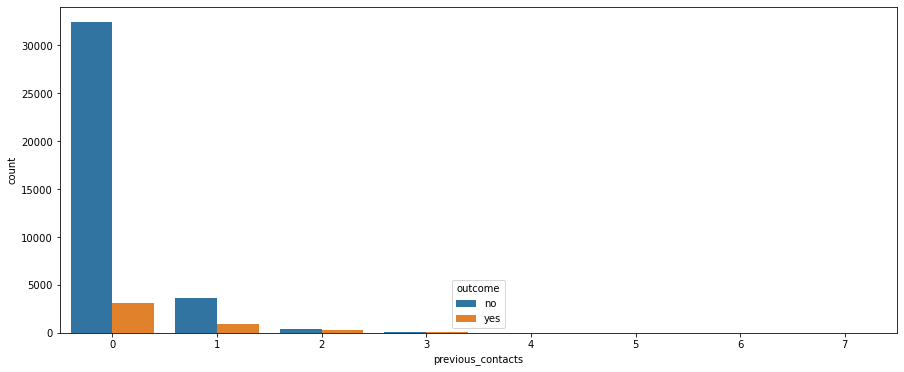

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(x="previous_contacts",hue="outcome",data=data)
plt.show()

- The previous feature is very similarly distributed for both the classes in the target variable. From basic EDA it is not sure how much value this individual feature have on the target variable.

## Previous Outcome

In [46]:
data.previous_outcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: previous_outcome, dtype: int64

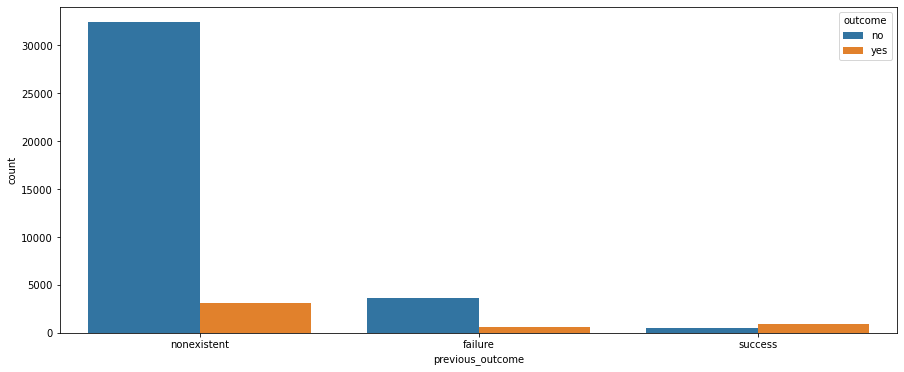

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x="previous_outcome",hue="outcome",data=data)
plt.show()

- Most of the data is non existent, which means outcome is unknown.

## Employee Variance Rate

- The employee variance rate, also known as the jobless rate, is a measure of the percentage of the labor force that is unemployed but actively seeking employment and willing to work.

In [48]:
data.emp_var_rate.value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

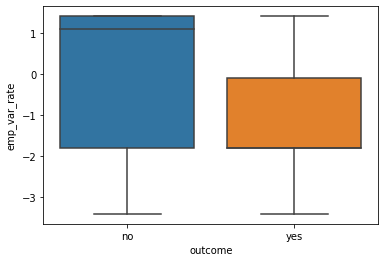

In [49]:
sns.boxplot(x="outcome", y="emp_var_rate",data=data)
plt.show()

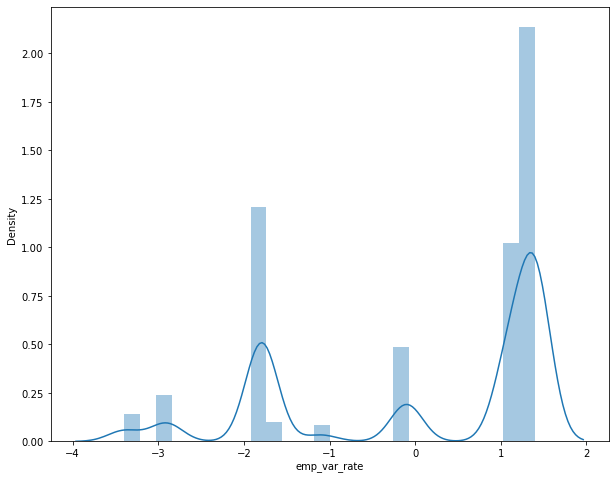

In [50]:
plt.figure(figsize=(10,8))
sns.distplot(data["emp_var_rate"])
plt.show()

## Consumer Price Index

- The Consumer Price Index (CPI) measures the monthly change in prices paid by consumers.

In [51]:
data.cons_price_idx.value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons_price_idx, dtype: int64

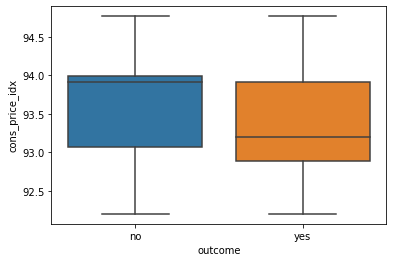

In [52]:
sns.boxplot(x="outcome", y="cons_price_idx",data=data)
plt.show()

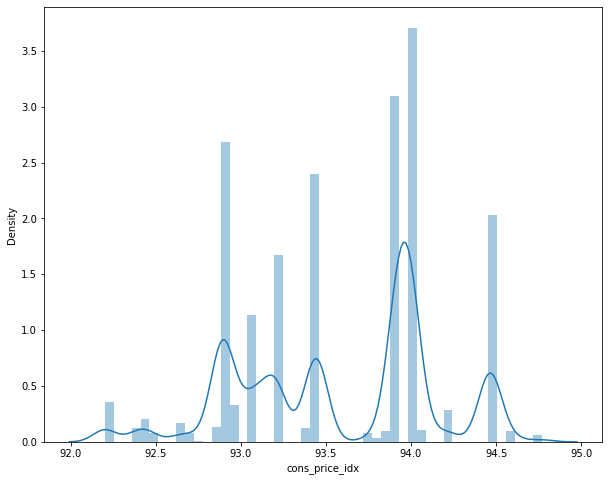

In [53]:
plt.figure(figsize=(10,8))
sns.distplot(data["cons_price_idx"])
plt.show()

## Consumer Confidance Index

- The Consumer Confidence Index (CCI) is a survey that measures how optimistic or pessimistic consumers are regarding their expected financial situation.

In [54]:
data.cons_conf_idx.value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons_conf_idx, dtype: int64

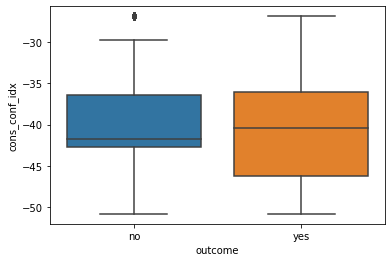

In [55]:
sns.boxplot(x="outcome", y="cons_conf_idx",data=data)
plt.show()

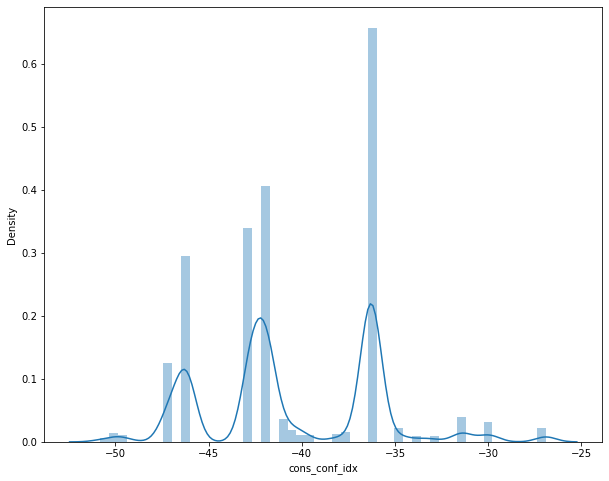

In [56]:
plt.figure(figsize=(10,8))
sns.distplot(data["cons_conf_idx"])
plt.show()

## Euribor 3 Month

- Euribor, or the Euro Interbank Offer Rate, is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-term lending on the inter-bank market.

In [57]:
data.euribor_3_month.value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.047       1
0.933       1
3.329       1
3.816       1
1.574       1
Name: euribor_3_month, Length: 316, dtype: int64

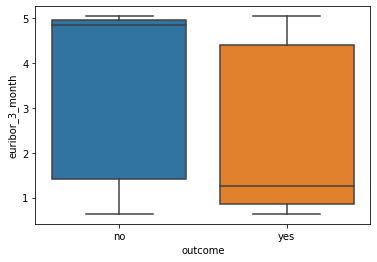

In [58]:
sns.boxplot(x="outcome", y="euribor_3_month",data=data)
plt.show()

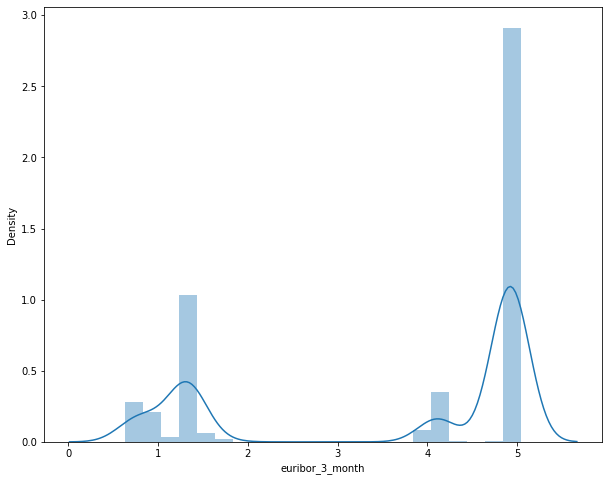

In [59]:
plt.figure(figsize=(10,8))
sns.distplot(data["euribor_3_month"])
plt.show()

## Number Employed

In [60]:
data.num_employed.value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: num_employed, dtype: int64

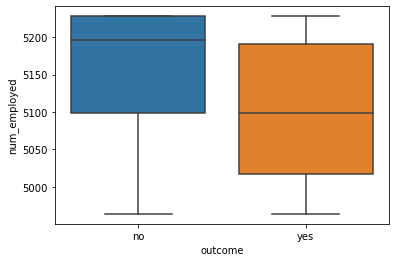

In [61]:
sns.boxplot(x="outcome", y="num_employed",data=data)
plt.show()

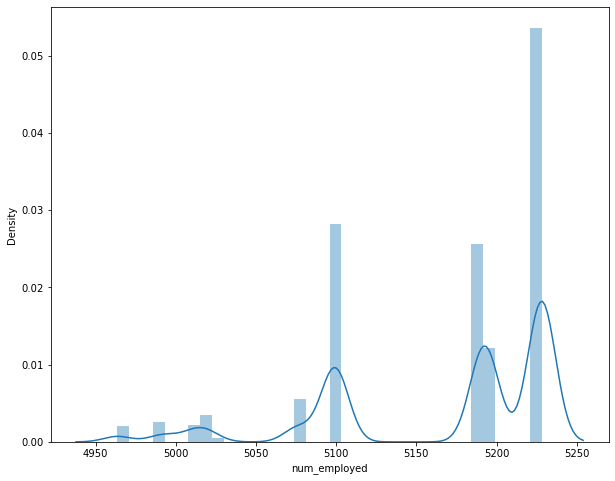

In [62]:
plt.figure(figsize=(10,8))
sns.distplot(data["num_employed"])
plt.show()

# Data Preprocessing and Feature Engineering

## Checking for Null Values

In [63]:
data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day                  0
call_duration        0
campaign_contacts    0
passed_days          0
previous_contacts    0
previous_outcome     0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor_3_month      0
num_employed         0
outcome              0
dtype: int64

- No null vaues in the dataset.

In [64]:
data.describe()

,age,call_duration,campaign_contacts,passed_days,previous_contacts,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_month,num_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Checking for Duplicates

In [65]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day,call_duration,campaign_contacts,passed_days,previous_contacts,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_month,num_employed,outcome
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


## Droping Duplicates

In [66]:
data.drop_duplicates(keep='first',inplace=True)

# Handling passed_days(pdays) feature

- As discussed earlier passed_days feature does not have same scale. Therefore, we will convert the feature in categorical form.
- the digits will be replaced by their corresponding words.
- "999" will be replaced as "not contacted"

In [67]:
data.passed_days.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [68]:
data.loc[data["passed_days"]==999,"passed_days"]="not contacted"
data.loc[data["passed_days"]==6,"passed_days"]="six"
data.loc[data["passed_days"]==4,"passed_days"]="four"
data.loc[data["passed_days"]==3,"passed_days"]="three"
data.loc[data["passed_days"]==5,"passed_days"]="five"
data.loc[data["passed_days"]==1,"passed_days"]="one"
data.loc[data["passed_days"]==0,"passed_days"]="zero"
data.loc[data["passed_days"]==10,"passed_days"]="ten"
data.loc[data["passed_days"]==7,"passed_days"]="seven"
data.loc[data["passed_days"]==8,"passed_days"]="eight"
data.loc[data["passed_days"]==9,"passed_days"]="nine"
data.loc[data["passed_days"]==11,"passed_days"]="eleven"
data.loc[data["passed_days"]==2,"passed_days"]="two"
data.loc[data["passed_days"]==12,"passed_days"]="twelve"
data.loc[data["passed_days"]==13,"passed_days"]="thirteen"
data.loc[data["passed_days"]==14,"passed_days"]="fourteen"
data.loc[data["passed_days"]==15,"passed_days"]="fifteen"
data.loc[data["passed_days"]==16,"passed_days"]="sixteen"
data.loc[data["passed_days"]==21,"passed_days"]="twenty one"
data.loc[data["passed_days"]==17,"passed_days"]="seventeen"
data.loc[data["passed_days"]==18,"passed_days"]="eighteen"
data.loc[data["passed_days"]==22,"passed_days"]="twenty two"
data.loc[data["passed_days"]==25,"passed_days"]="twenty five"
data.loc[data["passed_days"]==26,"passed_days"]="twenty six"
data.loc[data["passed_days"]==19,"passed_days"]="nineteen"
data.loc[data["passed_days"]==27,"passed_days"]="twenty seven"
data.loc[data["passed_days"]==20,"passed_days"]="twenty"

## One Hot Encoding Categircal Variables

- Converting categorical data to numerical data.

In [69]:
data.job=pd.get_dummies(data.job,drop_first=True)
data.marital=pd.get_dummies(data.marital,drop_first=True)
data.education=pd.get_dummies(data.education,drop_first=True)
data.default=pd.get_dummies(data.default,drop_first=True)
data.housing=pd.get_dummies(data.housing,drop_first=True)
data.loan=pd.get_dummies(data.loan,drop_first=True)
data.contact=pd.get_dummies(data.contact,drop_first=True)
data.month=pd.get_dummies(data.month,drop_first=True)
data.day=pd.get_dummies(data.day,drop_first=True)
data.previous_outcome=pd.get_dummies(data.previous_outcome,drop_first=True)
data.passed_days=pd.get_dummies(data.passed_days,drop_first=True)
data.outcome=pd.get_dummies(data.outcome,drop_first=True)

In [70]:
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day,call_duration,campaign_contacts,passed_days,previous_contacts,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_month,num_employed,outcome
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,0.224718,0.605231,0.055639,0.208762,0.024043,0.024043,0.365286,0.149990,0.206722,258.315815,2.567879,0.000170,0.173013,0.863391,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,0.417402,0.488807,0.229226,0.406429,0.153185,0.153185,0.481516,0.357066,0.404960,259.305321,2.770318,0.013038,0.494964,0.343438,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,2.000000,0.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,319.000000,3.000000,0.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,1.000000,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# Checking for Outliers

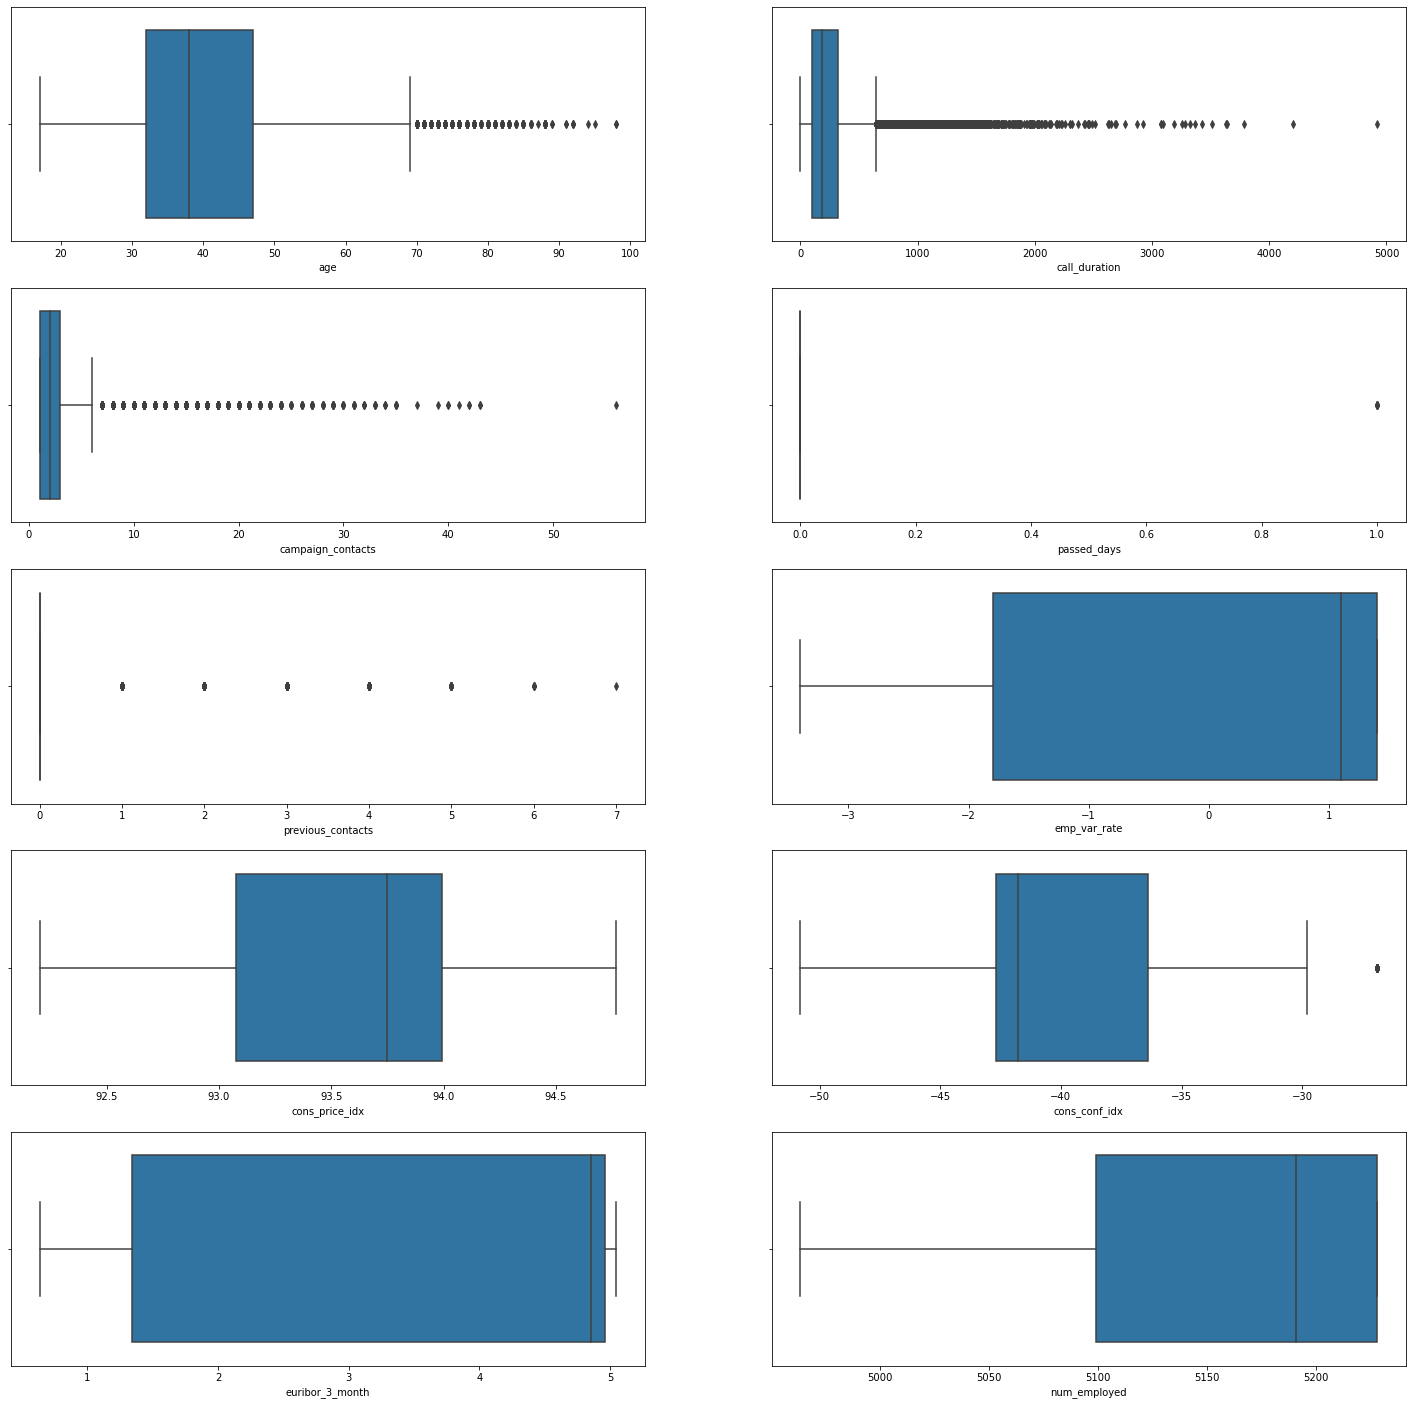

In [71]:
fig, axes = plt.subplots(5,2,figsize=(25,25))

# Checking outliers for age
sns.boxplot(x="age",ax = axes[0,0],data=data)

# Checking outliers for call duration
sns.boxplot(x="call_duration",ax = axes[0,1],data=data)

# Checking outliers for campaign contacts
sns.boxplot(x="campaign_contacts",ax = axes[1,0],data=data)

# Checking outliers for passed days
sns.boxplot(x="passed_days",ax = axes[1,1],data=data)

# Checking outliers for previous contacts
sns.boxplot(x="previous_contacts",ax = axes[2,0],data=data)

# Checking outliers for employee variance rate
sns.boxplot(x="emp_var_rate",ax = axes[2,1],data=data)

# Checking outliers for consumer price index
sns.boxplot(x="cons_price_idx",ax = axes[3,0],data=data)

# Checking outliers for consumer confidance index
sns.boxplot(x="cons_conf_idx",ax = axes[3,1],data=data)

# Checking outliers for euribor 3 month rate
sns.boxplot(x="euribor_3_month",ax = axes[4,0],data=data)

# Checking outliers for number employed
sns.boxplot(x="num_employed",ax = axes[4,1],data=data)

sns.set_context("paper", font_scale=2)
plt.show()

- Age, Call Duration & Campaign Contacts have large number of outliers.

## Outlier Handling

- While taking trials on the dataset it is observed that handling outliers is not affecting the scores much, Therefore skipping this step intentionally.

# Checking Correlation

In [72]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day,call_duration,campaign_contacts,passed_days,previous_contacts,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_month,num_employed,outcome
age,1.000000,-0.024178,0.271344,0.009918,0.164974,-0.001089,-0.001089,0.006917,0.065239,0.019035,-0.000808,0.004622,-0.001996,0.024379,-0.016389,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
job,-0.024178,1.000000,0.129248,0.231031,0.176708,0.006658,0.006658,0.094617,-0.131318,-0.009742,0.012960,-0.001798,-0.007020,-0.054885,0.043887,0.057229,0.075246,-0.101618,0.046743,0.063924,-0.074431
marital,0.271344,0.129248,1.000000,0.082239,0.130370,-0.003626,-0.003626,0.063636,0.037861,0.005064,-0.004053,0.002329,0.002909,-0.043432,0.043029,0.080190,0.046462,0.062033,0.088906,0.082469,-0.043476
education,0.009918,0.231031,0.082239,1.000000,0.097164,0.003401,0.003401,0.045576,-0.060125,-0.013239,0.005766,-0.000957,-0.003165,-0.021486,0.016958,0.023000,0.031112,-0.032890,0.021157,0.025788,-0.023493
default,0.164974,0.176708,0.130370,0.097164,1.000000,0.007929,0.007929,0.135642,-0.008923,0.007085,-0.011599,0.032992,-0.006698,-0.102646,0.104272,0.203212,0.168325,0.026332,0.195250,0.189729,-0.099305
housing,-0.001089,0.006658,-0.003626,0.003401,0.007929,1.000000,1.000000,0.022181,-0.008210,-0.005346,-0.004916,-0.000412,-0.002047,0.003753,-0.001735,0.003149,0.016349,0.007247,0.002874,-0.001255,-0.002275
loan,-0.001089,0.006658,-0.003626,0.003401,0.007929,1.000000,1.000000,0.022181,-0.008210,-0.005346,-0.004916,-0.000412,-0.002047,0.003753,-0.001735,0.003149,0.016349,0.007247,0.002874,-0.001255,-0.002275
contact,0.006917,0.094617,0.063636,0.045576,0.135642,0.022181,0.022181,1.000000,-0.280676,-0.016230,-0.026665,0.077387,-0.006023,-0.212903,0.242575,0.393730,0.591596,0.251575,0.399892,0.269285,-0.144774
month,0.065239,-0.131318,0.037861,-0.060125,-0.008923,-0.008210,-0.008210,-0.280676,1.000000,-0.009358,-0.041854,0.015045,-0.000260,-0.048856,0.076188,0.177834,-0.192096,0.445306,0.164479,0.193052,-0.008778
day,0.019035,-0.009742,0.005064,-0.013239,0.007085,-0.005346,-0.005346,-0.016230,-0.009358,1.000000,-0.023097,0.014401,-0.002056,-0.002022,0.002238,-0.018257,0.001203,-0.041396,-0.023379,-0.017532,-0.021241


<AxesSubplot:>

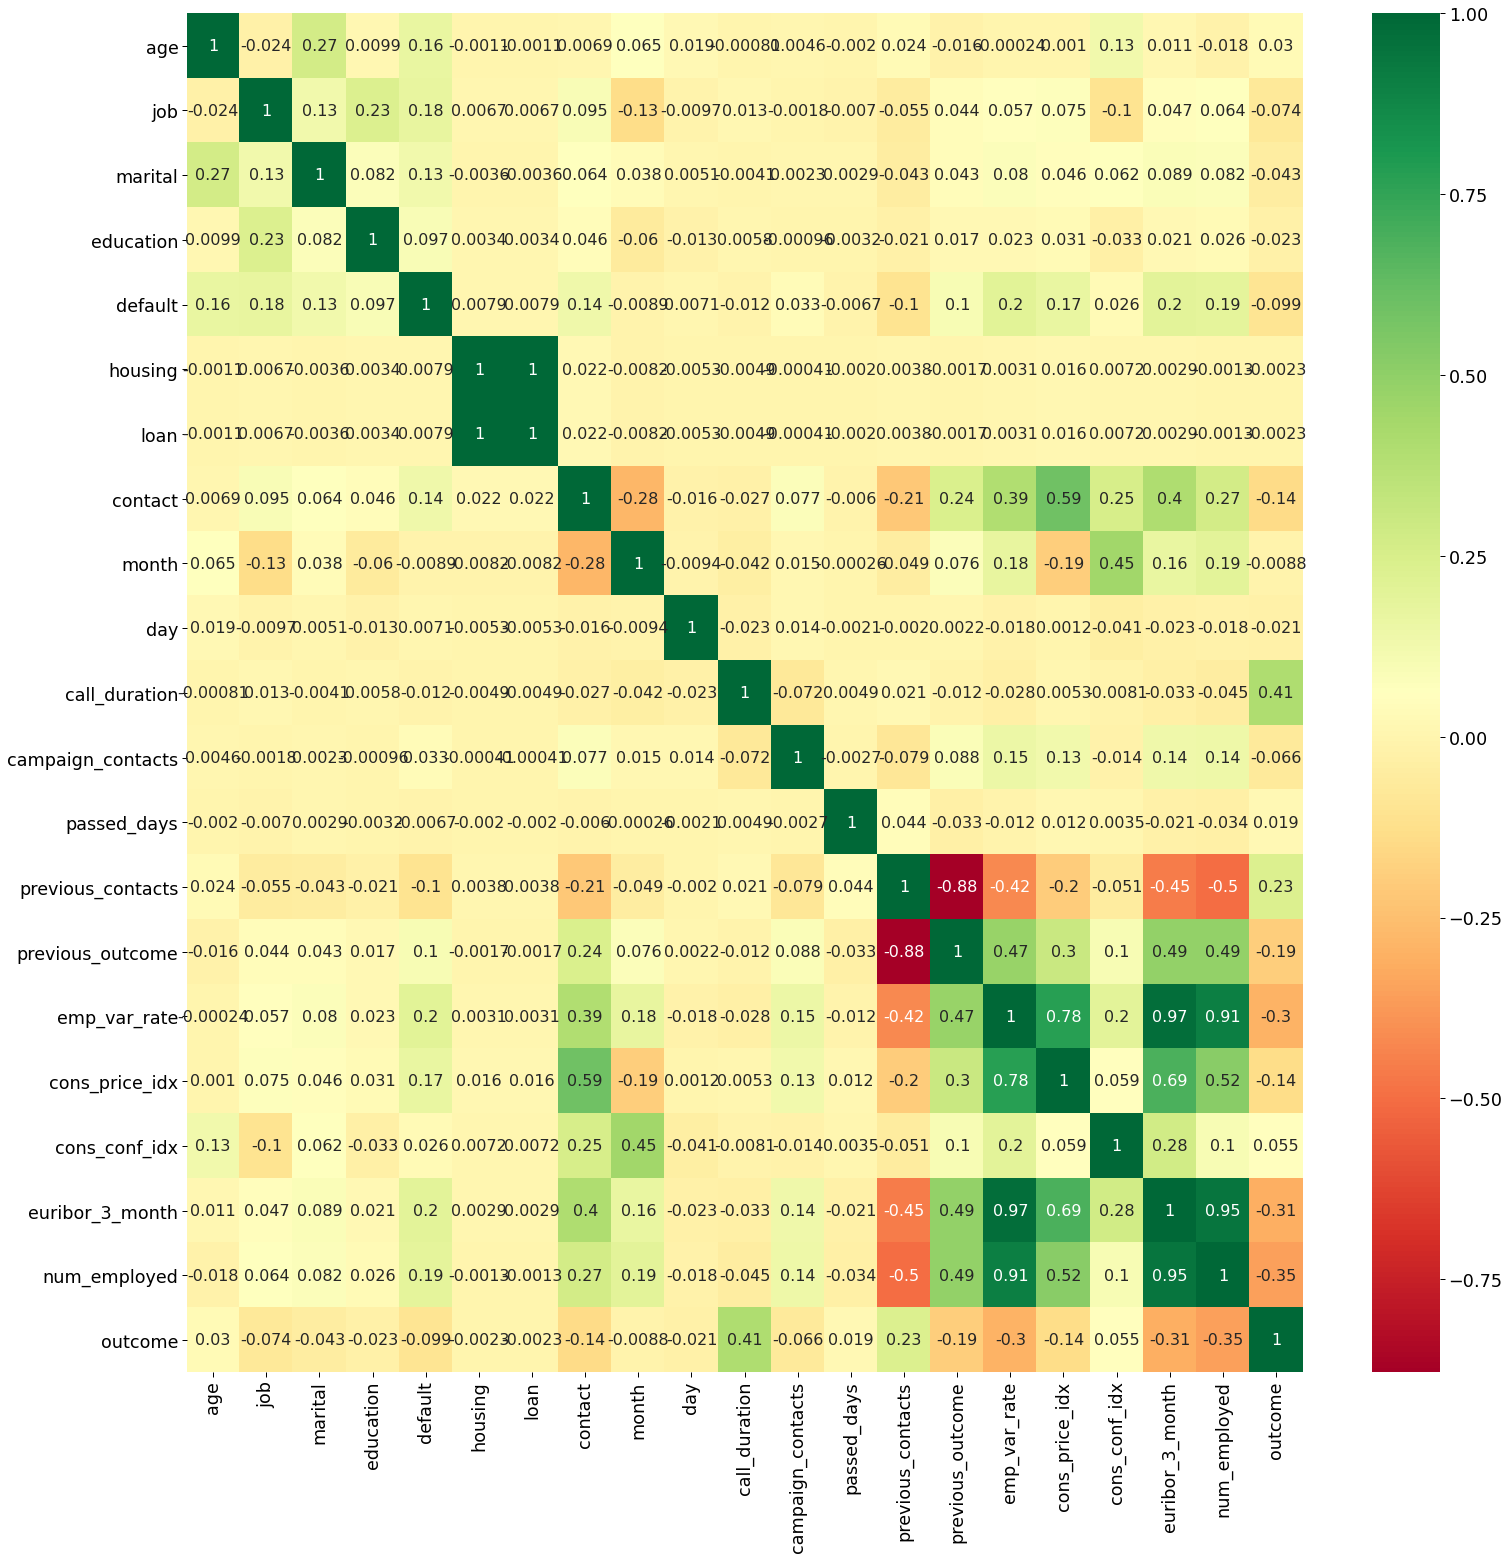

In [73]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":16})

- From the above heatmap we can observe that some numerical features share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.
- Again it has been concluded from the trials previously is that dropping the features is affecting the scores and misclassification badly.

In [74]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day,call_duration,campaign_contacts,passed_days,previous_contacts,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_month,num_employed,outcome
0,56,0,1,0,0,0,0,1,0,1,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0,1,0,1,0,0,1,0,1,149,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0,1,0,0,0,0,1,0,1,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,0,1,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0,1,0,0,0,0,1,0,1,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [75]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data['age']=scale.fit_transform(data[['age']])
data['call_duration']=scale.fit_transform(data[['call_duration']])
data['campaign_contacts']=scale.fit_transform(data[['campaign_contacts']])
data['previous_contacts']=scale.fit_transform(data[['previous_contacts']])
data['cons_price_idx']=scale.fit_transform(data[['cons_price_idx']])
data['cons_conf_idx']=scale.fit_transform(data[['cons_conf_idx']])
data['num_employed']=scale.fit_transform(data[['num_employed']])

In [76]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day,call_duration,campaign_contacts,passed_days,previous_contacts,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_month,num_employed,outcome
0,0.481481,0,1,0,0,0,0,1,0,1,0.053070,0.0,0,0.0,1,1.1,0.698753,0.60251,4.857,0.859735,0
1,0.493827,0,1,0,1,0,0,1,0,1,0.030297,0.0,0,0.0,1,1.1,0.698753,0.60251,4.857,0.859735,0
2,0.246914,0,1,0,0,0,0,1,0,1,0.045954,0.0,0,0.0,1,1.1,0.698753,0.60251,4.857,0.859735,0
3,0.283951,0,1,1,0,0,0,1,0,1,0.030704,0.0,0,0.0,1,1.1,0.698753,0.60251,4.857,0.859735,0
4,0.481481,0,1,0,0,0,0,1,0,1,0.062424,0.0,0,0.0,1,1.1,0.698753,0.60251,4.857,0.859735,0


# Saving the processed data

In [77]:
data.to_excel("Portuguese_Bank_Processed.xlsx",index=False)

# Train Test split

In [78]:
data.outcome.value_counts()

0    36537
1     4639
Name: outcome, dtype: int64

- Data is highly imbalanced with only 4639 values for "yes"
- From previous trails it is observed that the balancing the data before training is giving better results than balancing the data after training.

In [79]:
X = data.drop(columns = ['outcome'])
y = data['outcome']

# Balancing the data using SMOTE

In [80]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [81]:
X_smote, y_smote  = smote.fit_resample(X, y)

In [82]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 36537, 1: 4639})
SMOTE Classes Counter({0: 36537, 1: 36537})


In [83]:
from sklearn.model_selection import train_test_split
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

# Model Creation

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

clf.fit(X_smote_train,y_smote_train)

LogisticRegression()

In [85]:
y_pred=clf.predict(X_smote_test)

In [86]:
y_pred_prob=clf.predict_proba(X_smote_test)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [88]:
pd.crosstab(y_smote_test,y_pred) #3029 Misclassifications

col_0,0,1
outcome,,
0,9367,1662
1,1367,9527


In [89]:
cr=classification_report(y_smote_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     11029
           1       0.85      0.87      0.86     10894

    accuracy                           0.86     21923
   macro avg       0.86      0.86      0.86     21923
weighted avg       0.86      0.86      0.86     21923



# KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote_train,y_smote_train)
    pred_i = knn.predict(X_smote_test)
    error_rate.append(np.mean(pred_i != y_smote_test)) 
    
error_rate

[0.06947041919445332,
 0.08347397710167404,
 0.07708798978242029,
 0.08155818090589792,
 0.08589152944396296,
 0.08894768051817725,
 0.09227751676321672,
 0.0937827852027551,
 0.09738630661861972,
 0.09765999178944487]

Text(0, 0.5, 'Error Rate')

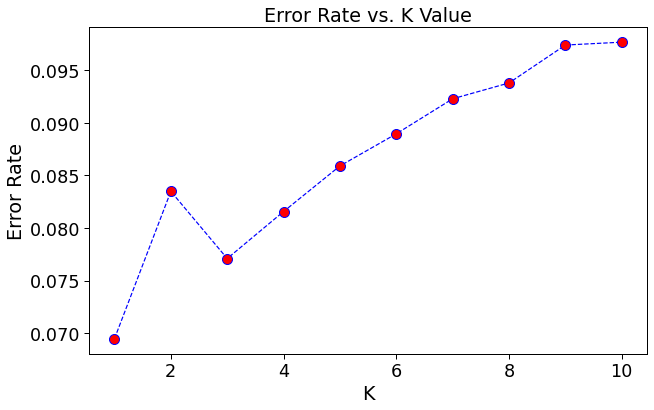

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [92]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_smote_train,y_smote_train)
y_pred = knn.predict(X_smote_test)

In [93]:
print("The accuracy score is : ", accuracy_score(y_smote_test,y_pred))

The accuracy score is :  0.9229120102175797


In [94]:
pd.crosstab(y_smote_test,y_pred) #1690 Misclassifications

col_0,0,1
outcome,,
0,9620,1409
1,281,10613


In [95]:
print(classification_report(y_smote_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     11029
           1       0.88      0.97      0.93     10894

    accuracy                           0.92     21923
   macro avg       0.93      0.92      0.92     21923
weighted avg       0.93      0.92      0.92     21923



# SVM

In [96]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_smote_train,y_smote_train)

SVC()

In [97]:
y_hat=svclassifier.predict(X_smote_test)

In [98]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_smote_test,y_hat)
acc

0.8762030743967523

In [99]:
cm1=pd.crosstab(y_smote_test,y_hat) # 2714 Misclassifications
cm1

col_0,0,1
outcome,,
0,9237,1792
1,922,9972


In [100]:
print(classification_report(y_smote_test,y_hat))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     11029
           1       0.85      0.92      0.88     10894

    accuracy                           0.88     21923
   macro avg       0.88      0.88      0.88     21923
weighted avg       0.88      0.88      0.88     21923



# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')  
dt.fit(X_smote_train,y_smote_train)
y_hat_dtree=dt.predict(X_smote_test)
y_hat_dtree

array([0, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [102]:
pd.crosstab(y_smote_test,y_hat_dtree) #2923 Misclassifications

col_0,0,1
outcome,,
0,9481,1548
1,1375,9519


In [103]:
print(classification_report(y_smote_test,y_hat_dtree))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11029
           1       0.86      0.87      0.87     10894

    accuracy                           0.87     21923
   macro avg       0.87      0.87      0.87     21923
weighted avg       0.87      0.87      0.87     21923



# Hyperparameter tuning for Decision Tree

In [104]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)


tree_cv.fit(X_smote_train,y_smote_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [105]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf= 1,min_samples_split=2,splitter='best')
dt1.fit(X_smote_train,y_smote_train)
y_hat_dtree_hyper=dt1.predict(X_smote_test)
y_hat_dtree_hyper

array([0, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [106]:
pd.crosstab(y_smote_test,y_hat_dtree_hyper) #1765 misclassification

col_0,0,1
outcome,,
0,9901,1128
1,637,10257


In [107]:
print(classification_report(y_smote_test,y_hat_dtree_hyper))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     11029
           1       0.90      0.94      0.92     10894

    accuracy                           0.92     21923
   macro avg       0.92      0.92      0.92     21923
weighted avg       0.92      0.92      0.92     21923



# Bagging with base estimator as KNN, because KNN has performed better

In [108]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=knn,n_estimators=20)

model_bagg.fit(X_smote_train,y_smote_train)

y_hat_bagg=model_bagg.predict(X_smote_test)

In [109]:
pd.crosstab(y_smote_test,y_hat_bagg) #1699 Misclassifications

col_0,0,1
outcome,,
0,9607,1422
1,277,10617


In [110]:
print(classification_report(y_smote_test,y_hat_bagg))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     11029
           1       0.88      0.97      0.93     10894

    accuracy                           0.92     21923
   macro avg       0.93      0.92      0.92     21923
weighted avg       0.93      0.92      0.92     21923



# XGBoost

In [111]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_smote_train, y_smote_train)
y_hat_xgb = xgb.predict(X_smote_test)

In [113]:
pd.crosstab(y_smote_test,y_hat_xgb) #1151 Misclassifications

col_0,0,1
outcome,,
0,10364,665
1,486,10408


In [114]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_smote_test,y_hat_xgb))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11029
           1       0.94      0.96      0.95     10894

    accuracy                           0.95     21923
   macro avg       0.95      0.95      0.95     21923
weighted avg       0.95      0.95      0.95     21923



# Conclusion

- XGBoost is giving less misclassifications with very good results.
- 1151 misclassifications out of 73074 means we have approximately 98 percent correct predictions.
- As a thumb rule, ML model with 90% or above correct predictions is considered as good model.

# Saving Pre-Trained Model

In [7]:
import pickle
# open a file, where you ant to store the data
file = open('Portuguese_Bank_Telemarketing_Campaign_Prediction_Model.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)

In [8]:
pip freeze> requirements.txt

Note: you may need to restart the kernel to use updated packages.
